# Assignment 07/01/2025

## Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Image loading, conversion to grayscale

In [ ]:
cam_image = cv2.imread("../images/sample_cam_image.jpg")
cam_image.min(), cam_image.max(), cam_image.shape

(0, 255, (8160, 6120, 3))

In [3]:
grayscale = cv2.cvtColor(cam_image, cv2.COLOR_BGR2GRAY)
grayscale.shape

(8160, 6120)

## 1. Convert Gray Image to black and white using various thresholds

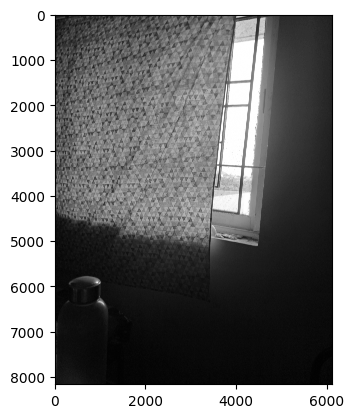

In [4]:
plt.imshow(grayscale, cmap='gray')

### Applying thresholding function

In [13]:
def threshold(x, thresh = 55):
    if x <= thresh:
        return 0
    else:
        return 255

In [14]:
bw_fun = np.vectorize(threshold)

In [15]:
bw_image = bw_fun(grayscale)

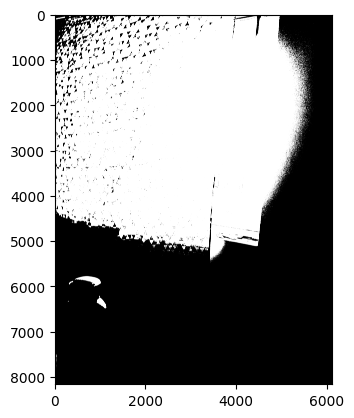

In [16]:
plt.imshow(bw_image, cmap="gray")

## 2. Point processing techniques

### 2a. Negative transformation

In [9]:
L = grayscale.max()
L

255

In [16]:
neg_image = L - grayscale

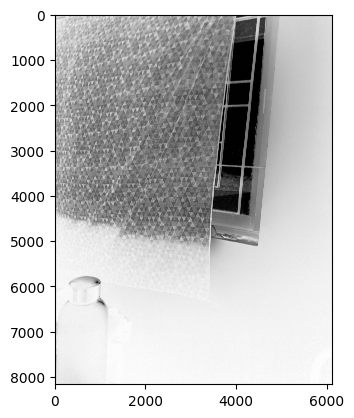

In [41]:
plt.imshow(neg_image, cmap='gray', vmin=0, vmax=255)

### 2b. Log transformation 

In [45]:
c = 10 # set val for c

In [46]:
log_image = c * (np.log(grayscale + 1)) # defaults to base 10

C:\Users\homea\AppData\Local\Temp\ipykernel_7444\788506833.py:1: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(grayscale + 1))


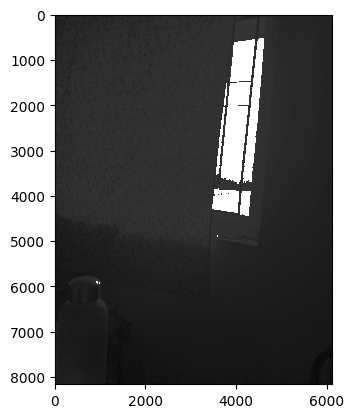

In [47]:
plt.imshow(log_image, cmap='gray', vmin=0, vmax=255)

### 2c. Inverse log transformation

In [91]:
c = 0.25 # set value for c

In [92]:
inv_log_image = c * ((10 ** grayscale) - 1)

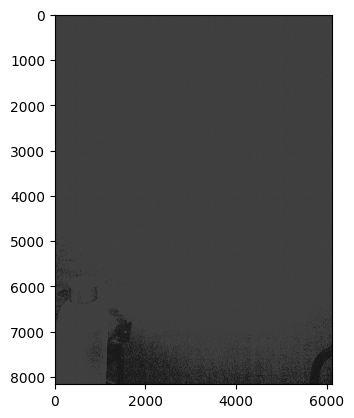

In [93]:
plt.imshow(inv_log_image, cmap='gray', vmin=0, vmax=255)

### 2d. Power law (GAMMA) transformation

In [94]:
c = 10 # set value for c
y = 10 # set value for gamma

In [95]:
power_image = (c * (grayscale ** y)).astype(int)

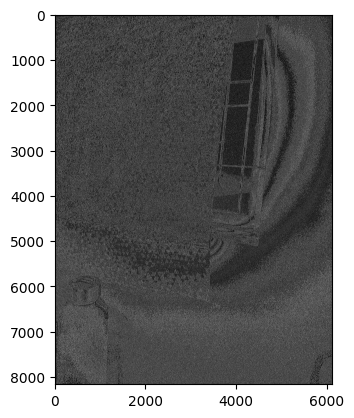

In [96]:
plt.imshow(power_image, cmap='gray', vmin=0, vmax=255)

### 2e. Contrast stretching transformation

In [97]:
def contrast_stretching(x, a=50, b=200, sa=30, sb=220, alpha=0.5, beta=1.0, gamma=0.8):
    if x < a:
        return alpha * x
    elif a <= x < b:
        return beta * (x - a) + sa
    else:
        return gamma * (x - b) + sb

In [98]:
contrast_stretching = np.vectorize(contrast_stretching)

In [99]:
contrast_stretch_image = contrast_stretching(grayscale)

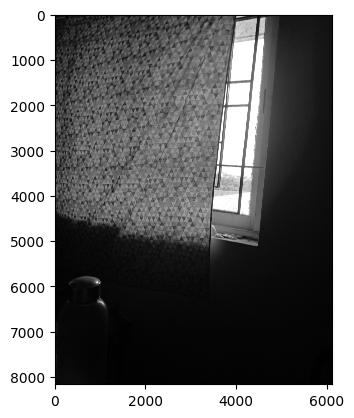

In [102]:
plt.imshow(contrast_stretch_image, cmap='gray', vmin=0, vmax=255)

### 2f. Gray level slicing transformation

In [4]:
def gray_level_slice(x, low_level=100, high_level=200):
    if x >= low_level and x <= high_level:
        return 255
    else:
        return 0

In [5]:
gray_level_slice = np.vectorize(gray_level_slice)

In [6]:
gray_slice_image = gray_level_slice(grayscale)

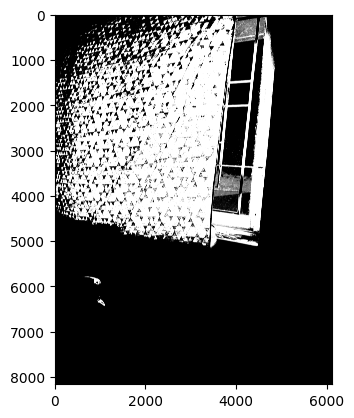

In [7]:
plt.imshow(gray_slice_image, cmap='gray', vmin=0, vmax=255)

### 2g. Bit plane slicing transformation

In [120]:
def bit_plane_slice(x, bit_plane = 5):
    bit = 1 << bit_plane
    if(x < bit):
        return 0
    else:
        return 255

In [121]:
bit_plane_slice = np.vectorize(bit_plane_slice)

In [122]:
bit_plane_image = bit_plane_slice(grayscale)

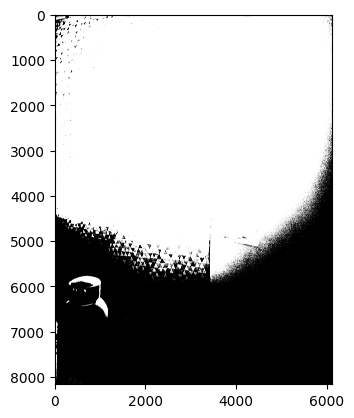

In [123]:
plt.imshow(bit_plane_image, cmap='gray', vmin=0, vmax=255)

## 3. Histogram processing techniques

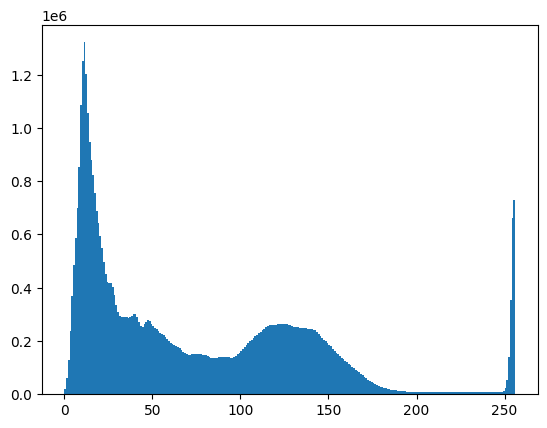

In [8]:
# FROM DOCUMENTATION: https://docs.opencv.org/4.x/d1/db7/tutorial_py_histogram_begins.html
_ = plt.hist(grayscale.ravel(), 256, [0,256])

In [9]:
original_histogram, bins = np.histogram(grayscale.flatten(), 256,[0,256])

### 3a. Histogram equalization

In [10]:
pdf = original_histogram / original_histogram.sum()

In [11]:
cdf = pdf.cumsum()

In [12]:
cdf_255 = (cdf * 255).astype('uint8') # histogram equalization level

In [13]:
img_new = cdf_255[grayscale.ravel()]
equalized_image = np.reshape(img_new, grayscale.shape)

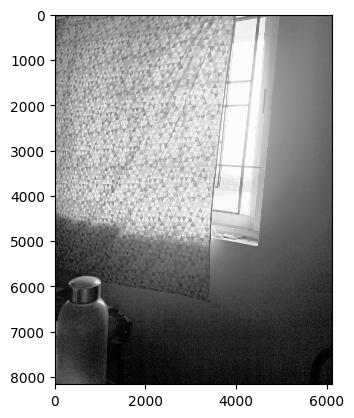

In [14]:
plt.imshow(equalized_image, cmap='gray', vmin=0, vmax=255)

### 3b. Histogram specification

In [ ]:
match_image = cv2.imread("../images/sample_cam_image.jpg")
match_grayscale = cv2.cvtColor(match_image, cv2.COLOR_BGR2GRAY)

In [16]:
match_histogram, bins = np.histogram(match_grayscale.flatten(), 256,[0,256])

In [17]:
match_pdf = original_histogram / original_histogram.sum()
match_cdf = match_pdf.cumsum()
match_cdf_255 = (cdf * 255).astype('uint8') # histogram equalization level

In [19]:
matched_img_new = match_cdf_255[equalized_image.ravel()]
matched_image = np.reshape(matched_img_new, grayscale.shape)

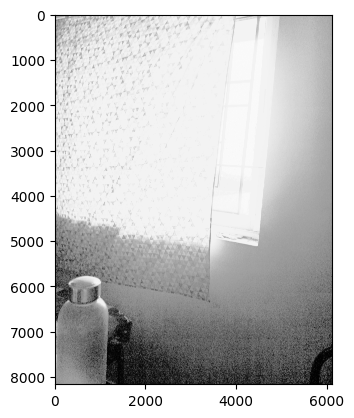

In [20]:
plt.imshow(matched_image, cmap='gray', vmin=0, vmax=255)

## 4. Mask processing techniques

### 4a. Linear smoothing

#### 4a1. Averaging

In [7]:
mask = np.ones([3, 3])
mask /= 9
mask

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [8]:
lin_smoothed_image = np.zeros_like(grayscale)
lin_smoothed_image.shape

(8160, 6120)

In [7]:
img_height, img_width = grayscale.shape

In [9]:
grayscale_fl = grayscale.astype(np.float64)

In [11]:
for i in range(1, img_height - 1):
    for j in range(1, img_width - 1):
        neighborhood = grayscale_fl[i-1:i+2, j-1:j+2]
        lin_smoothed_image[i, j] = int(np.sum(neighborhood * mask))

In [12]:
lin_smoothed_image.max()

255

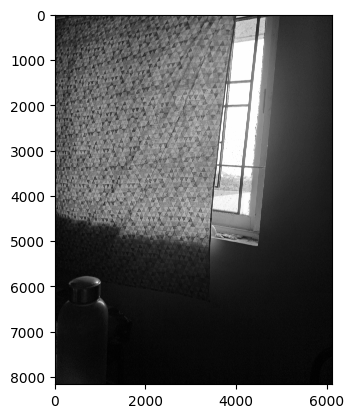

In [27]:
plt.imshow(lin_smoothed_image, cmap='gray', vmin=0, vmax=255)

#### 4a2. Weighted averaging

In [14]:
mask = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]], dtype=np.float32)
mask /= 16
mask

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]], dtype=float32)

In [15]:
weig_smoothed_image = np.zeros_like(grayscale)

In [16]:
for i in range(1, img_height - 1):
    for j in range(1, img_width - 1):
        neighborhood = grayscale_fl[i-1:i+2, j-1:j+2]
        weig_smoothed_image[i, j] = int(np.sum(neighborhood * mask))

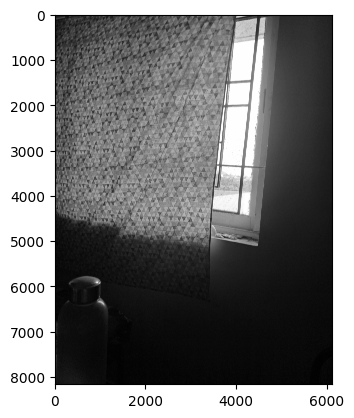

In [28]:
plt.imshow(weig_smoothed_image, cmap='gray', vmin=0, vmax=255)

### 4b. Median filtering

In [18]:
median_filt_image = np.zeros_like(grayscale)

In [19]:
for i in range(1, img_height - 1):
    for j in range(1, img_width - 1):
        neighborhood = grayscale_fl[i-1:i+2, j-1:j+2].flatten()
        median_filt_image[i, j] = int(np.median(neighborhood))

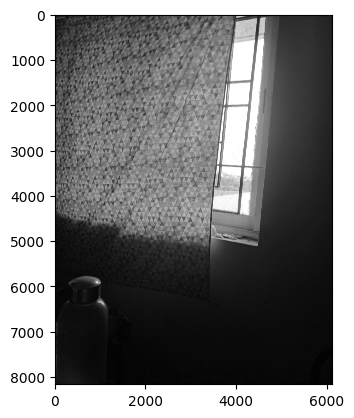

In [29]:
plt.imshow(median_filt_image, cmap='gray', vmin=0, vmax=255)

### 4c. Sharpen filtering

In [4]:
mask = np.array([[0, -1, 0], [-1, -4, -1], [0, -1, 0]], dtype=np.float32)
mask

array([[ 0., -1.,  0.],
       [-1., -4., -1.],
       [ 0., -1.,  0.]], dtype=float32)

In [5]:
sharpened_image = np.zeros_like(grayscale)

In [10]:
for i in range(1, img_height - 1):
    for j in range(1, img_width - 1):
        neighborhood = grayscale_fl[i-1:i+2, j-1:j+2]
        sharpened_image[i, j] = int(np.sum(neighborhood * mask))

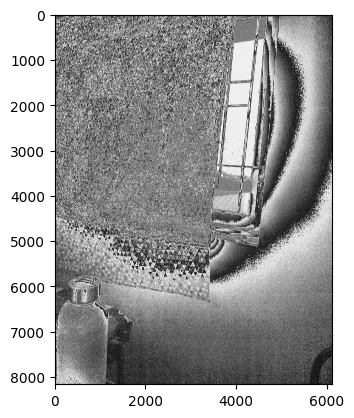

In [11]:
plt.imshow(grayscale - sharpened_image, cmap='gray', vmin=0, vmax=255)

In [12]:
l = 1